In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install investpy
!pip install vaderSentiment
!pip install nest_asyncio

fatal: destination path 'twint' already exists and is not an empty directory.
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38872 sha256=ad0cb3575696cdaea2dacb14daf97d9e4b67e73604aaebc459626ccf52caeba2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6mykzsjo/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [8]:
# importing important packages

from ipywidgets import interact, interactive, interact_manual, fixed
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn import model_selection
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import investpy as ipy
from tqdm import tqdm
import nest_asyncio
import pandas as pd
import numpy as np
import datetime
import twint
import nltk
import math
import re

In [3]:
# Construction of the dataset
# Here we consider the dataset for reliance industries
def create_data(input1,stock,input2):
  #yesterday=(datetime.date.today()-datetime.timedelta(1)).strftime('%d/%m/%Y')
  df = ipy.get_stock_historical_data(stock=stock, country='india', from_date=input1, to_date=input2, as_json=False, order='ascending')
  return df

In [4]:
# Let the user choose the dates
# Please note, the lower bound for the start_date is 01/01/2010 and the upper bound of the end_day is yesterday

start_date = input("Enter your start date in dd/mm/yyyy format:")
end_date = input("Enter your end date in dd/mm/yyyy format:")
company = input ("Enter the company code:")

Enter your start date in dd/mm/yyyy format:01/01/2015
Enter your end date in dd/mm/yyyy format:20/05/2021
Enter the company code:ongc


In [49]:
# Get the data

final_data=create_data(start_date, company,end_date).reset_index()
final_data.tail()

,Date,Open,High,Low,Close,Volume,Currency
1573,2021-05-14,116.00,116.0,111.55,112.95,23626454,INR
1574,2021-05-17,113.95,115.4,112.25,114.25,19960144,INR
1575,2021-05-18,115.00,117.5,114.30,116.10,29395736,INR
1576,2021-05-19,114.50,115.8,113.40,114.90,25295576,INR
1577,2021-05-20,113.45,114.7,111.20,111.80,21131044,INR


In [51]:
fig = px.area(y=final_data["Close"],x=final_data['Date'],title = 'Stock price of historical data (2015-2021)',labels={'x':'Year','y':'Price'})
fig.show()

In [52]:

def moving_average(days, column1):

  # Rolling Mean on Time series

  final_data['{}_days_simple_moving_average of closing values'.format(days)]=final_data[column1].rolling(window=days).mean()

  # Exponential Moving average

  final_data['{}_days_exponential_moving_average of closing values'.format(days)]=final_data[column1].ewm(span=days).mean()
  

  # Rolling standard deviation
  final_data['{}_days_rolling_std of closing values'.format(days)]=final_data[column1].rolling(window=days).std()

  # Plot the data:

  fig, ax = plt.subplots(1, figsize=(15,7))
  
  # closing values
  ax.plot(final_data[column1], color='red', linewidth=1, label='closing values')
  ax.plot(final_data['{}_days_simple_moving_average of closing values'.format(days)], color='green', linewidth=1, label='simple moving average')
  ax.plot(final_data['{}_days_exponential_moving_average of closing values'.format(days)], color='blue', linewidth=1, label=' exponential moving average')
  ax.plot(final_data['{}_days_rolling_std of closing values'.format(days)], color='black', linewidth=2, label=' rolling std')
  ax.grid()
  ax.set_title('{} days moving and exponential avegage'.format(days))
  ax.legend()
  
  plot=fig.tight_layout()
  return plot

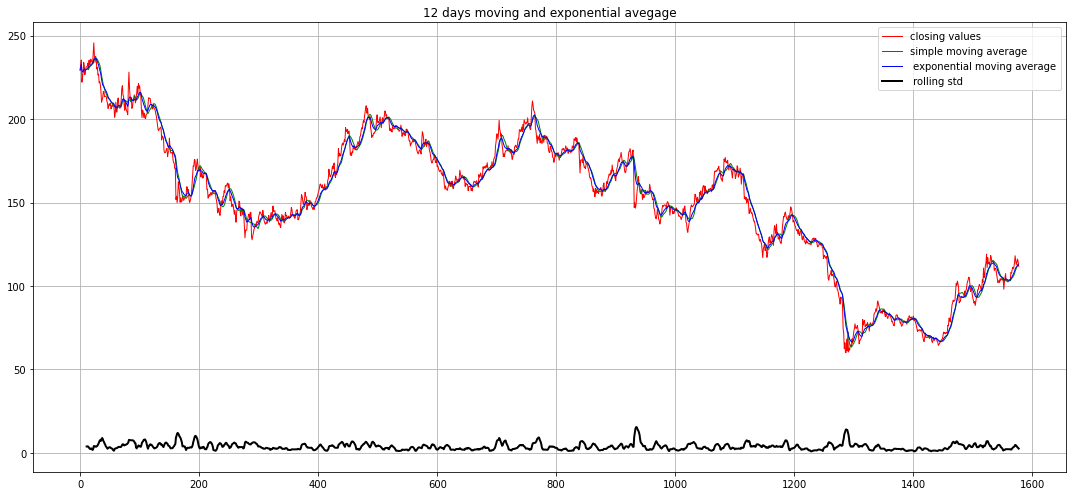

In [53]:
# 12 days moving average
_=moving_average(12,'Close')

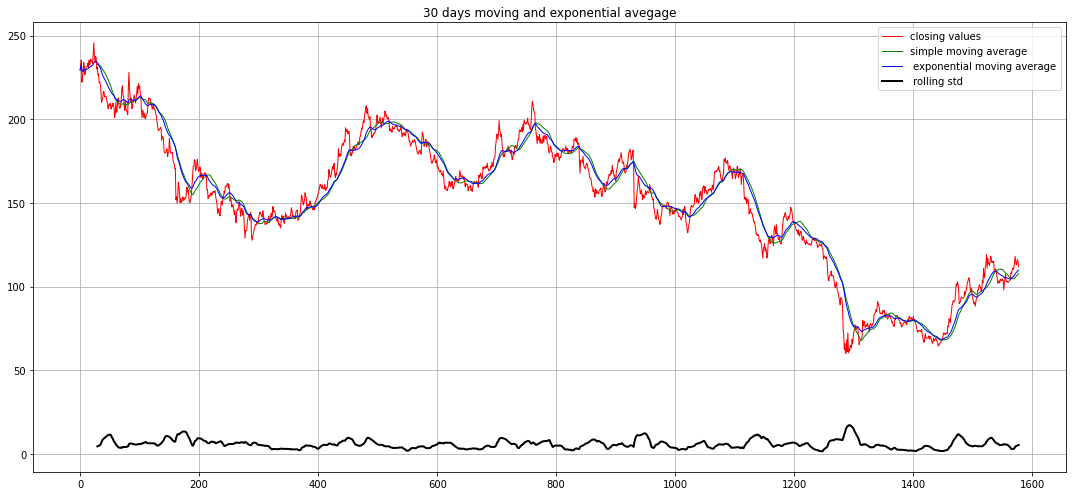

In [54]:
# 30 days moving average:
_=moving_average(30,'Close')


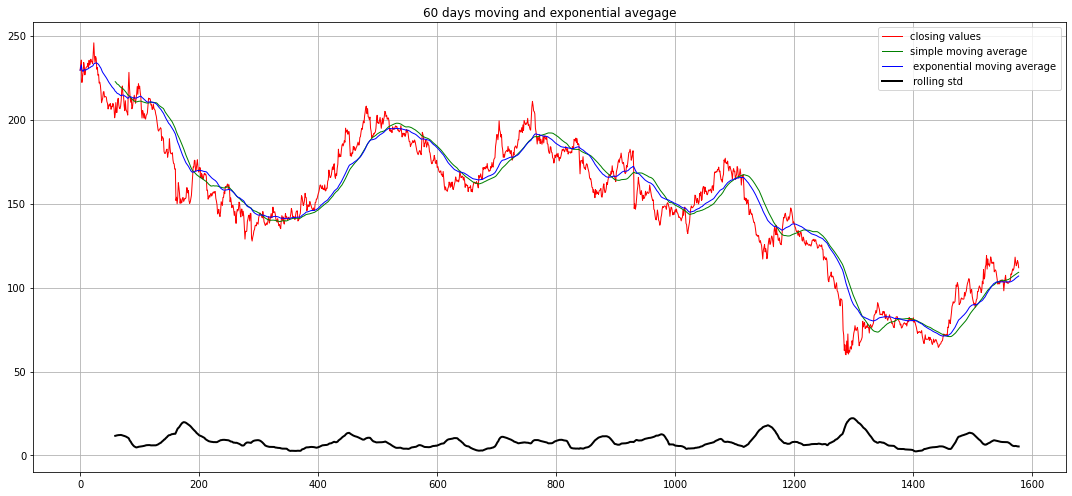

In [55]:
# 60 days moving average

_=moving_average(60,'Close')

In [56]:
final_data['daily_return']=(final_data['Close']/final_data['Close'].shift(1))-1


Text(0.5, 1.0, 'Daily returns of ONGC stocks')

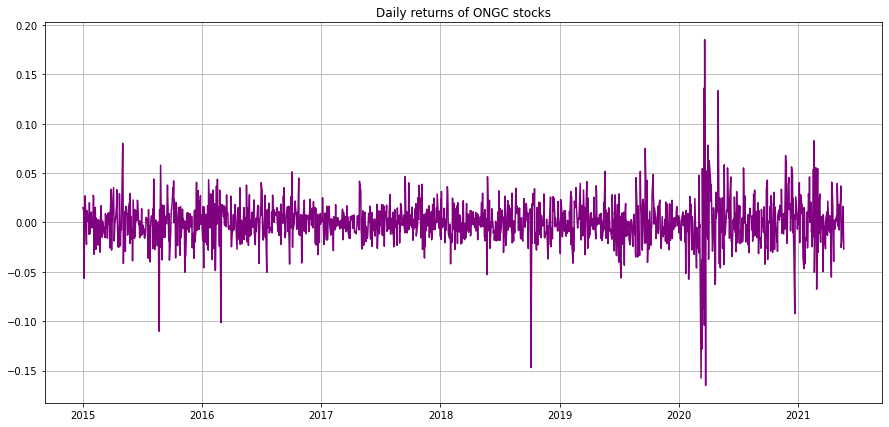

In [57]:
plt.figure(figsize=(15,7))
plt.plot(final_data['Date'],final_data['daily_return'], color='purple')
plt.grid()
plt.title("Daily returns of ONGC stocks")

Is it stationary: Dicky fuller test

In [58]:
from statsmodels.tsa.stattools import adfuller


In [59]:
def is_stationary(data):
  alpha=0.05
  outcome=adfuller(data)
  print("test statistic:", outcome[0])
  print("P-value:",outcome[1])
  if outcome[1]<alpha:
    print("VERDICT:\n As the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is stationary.")
  else:
    print("VERDICT:\nAs the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the data is non-stationary.")

In [60]:
is_stationary(final_data['Close'])

test statistic: -1.9105331147087854
P-value: 0.3271223409155868
VERDICT:
As the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the data is non-stationary.


Differencing method:

In [61]:
final_data['stationary_converted']=final_data['Close']-final_data['Close'].shift(1)

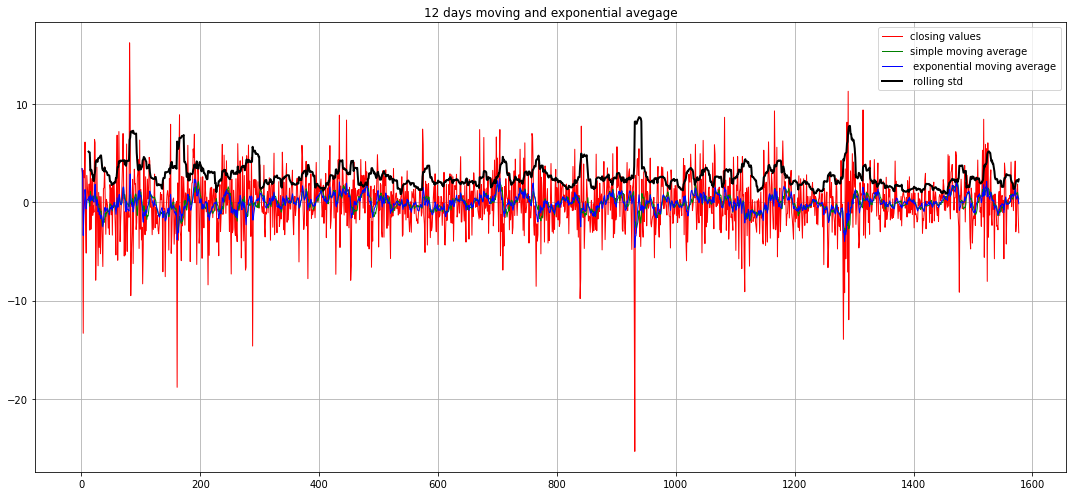

In [62]:
# 12 days moving average
_=moving_average(12,'stationary_converted')

In [63]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [64]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2015-01-01"
config.Until = "2015-06-30"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_1.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2015-07-01"
config.Until = "2015-12-30"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_2.csv"
#running search
#twint.run.Search(config)

In [ ]:

nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2016-01-01"
config.Until = "2016-06-30"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_3.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2016-07-01"
config.Until = "2016-12-31"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_4.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2017-01-01"
config.Until = "2017-05-30"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_5.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2017-06-01"
config.Until = "2017-12-31"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_6.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2018-01-01"
config.Until = "2018-12-31"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_7.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2019-01-01"
config.Until = "2019-06-30"
config.Store_csv = True
#config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_8.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2019-07-01"
config.Until = "2019-12-31"
config.Store_csv = True
config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_9.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2020-01-01"
config.Until = "2020-12-31"
config.Store_csv = True
config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_10.csv"
#running search
#twint.run.Search(config)

In [ ]:
nest_asyncio.apply()

#configuration

config = twint.Config()
config.Search = "ONGC"
config.Lang = "en"
config.Since = "2021-01-01"
config.Until = "2021-12-31"
config.Store_csv = True
config.Output = "/content/drive/MyDrive/bdos_fp_data/tweets_ongc_11.csv"
#running search
#twint.run.Search(config)

Finally we have gathered all the necessary tweets. Its time to build the dataset.

In [ ]:
data_2015_1sthalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_1.csv")
data_2015_2ndhalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_2.csv")
data_2016_1sthalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_3.csv")
data_2016_2ndhalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_4.csv")
data_2017_1sthalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_5.csv")
data_2017_2ndhalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_6.csv")
data_2018=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_7.csv")
data_2019_1sthalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_8.csv")
data_2019_2ndhalf=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_9.csv")
data_2020=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_10.csv")
data_2021=pd.read_csv("/content/drive/MyDrive/bdos_fp_data/tweets_ongc_11.csv")


In [ ]:
# Concat all the data
news_data=pd.concat([data_2015_1sthalf,data_2015_2ndhalf,data_2016_1sthalf,
                     data_2016_2ndhalf,data_2017_1sthalf,data_2017_2ndhalf,
                     data_2018,data_2019_1sthalf,data_2019_2ndhalf,
                     data_2020,data_2021])

In [ ]:
news_data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10583,1394983497081757706,1394904592031223810,2021-05-19 11:49:17 UTC,2021-05-19,11:49:17,0,2301661700,devsinghrawat7,देवसिंह रावत (DEV),NaN,@manoj_gairola @NewsNationTV @ONGC_ @mybmc @CM...,hi,[],[],[],0,0,1,[],[],https://twitter.com/DEVSINGHRAWAT7/status/1394...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'manoj_gairola', 'name': 'man...",NaN,NaN,NaN,NaN
10584,1394983256290955267,1394983256290955267,2021-05-19 11:48:20 UTC,2021-05-19,11:48:20,0,1666873268,56perumal,Perumal pillai,NaN,Assam: Abducted ONGC employee set to return ho...,en,"[{'screen_name': 'eorganiser', 'name': 'organi...",['https://www.organiser.org/Encyc/2021/5/19/As...,[],0,1,2,[],[],https://twitter.com/56perumal/status/139498325...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10585,1394982958067556353,1394842913075470339,2021-05-19 11:47:09 UTC,2021-05-19,11:47:09,0,1278941952642215937,vikas10462688,Vikas,NaN,@pcraindia @mygovindia @IndianOilcl @BPCLimite...,en,"[{'screen_name': 'pcraindia', 'name': 'petrole...",[],[],0,0,4,"['guesstheword', 'contestalert', 'conservefutu...",[],https://twitter.com/vikas10462688/status/13949...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'pcraindia', 'name': 'Petrole...",NaN,NaN,NaN,NaN
10586,1394982854862557188,1394842913075470339,2021-05-19 11:46:44 UTC,2021-05-19,11:46:44,0,1366657669914718208,pravu_78,Pravina Wahulkar,NaN,@pcraindia @mygovindia @IndianOilcl @BPCLimite...,en,"[{'screen_name': 'pcraindia', 'name': 'petrole...",[],[],0,0,0,"['guesstheword', 'pcra', 'conservefuture']",[],https://twitter.com/Pravu_78/status/1394982854...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'pcraindia', 'name': 'Petrole...",NaN,NaN,NaN,NaN
10587,1394982832901132292,1394982832901132292,2021-05-19 11:46:39 UTC,2021-05-19,11:46:39,0,3100910929,ramrathore142,Ram Rathore,NaN,INS Kochi of the Indian Navy just rescued 188 ...,en,[],[],['https://pbs.twimg.com/media/E1v5esMUcAUQict....,1,2,3,['cyclonetauktae'],[],https://twitter.com/ramrathore142/status/13949...,False,NaN,1,https://pbs.twimg.com/media/E1v5esMUcAUQict.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
# I will keep only those tweets whose language is English
news_data=news_data[news_data['language']=="en"]

In [ ]:
news_data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,615640769127297024,615640769127297024,2015-06-29 21:59:32 UTC,2015-06-29,21:59:32,0,562113977,exsikkose,Exsikkose,NaN,Deep Industries hires Gas Dehydration System f...,en,[],['http://bit.ly/1g3II1n'],[],0,0,0,[],[],https://twitter.com/Exsikkose/status/615640769...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,615623091599843328,615614686881562624,2015-06-29 20:49:17 UTC,2015-06-29,20:49:17,0,51003218,kabirtaneja,Kabir Taneja,NaN,"@DevirupaM Yes, I think usually went to former...",en,"[{'screen_name': 'nktpnd', 'name': 'ankit pand...",[],[],0,0,0,[],[],https://twitter.com/KabirTaneja/status/6156230...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,615597347246977024,615597347246977024,2015-06-29 19:06:59 UTC,2015-06-29,19:06:59,0,758049516,ppt_search,PPT Search,NaN,initial production testing in ongc PPT Slides ...,en,[],['http://www.ppthunter.com/initial-production-...,[],0,0,0,"['ppt', 'initial', 'production', 'testing', 'i...",[],https://twitter.com/PPT_Search/status/61559734...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,615576939672145922,615576939672145922,2015-06-29 17:45:53 UTC,2015-06-29,17:45:53,0,146905986,sashisai,buyyani sashikanth,NaN,@PetroleumMin where as India companies are th...,en,[],[],[],0,0,0,[],[],https://twitter.com/sashisai/status/6155769396...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,615576356743593984,615576356743593984,2015-06-29 17:43:34 UTC,2015-06-29,17:43:34,0,146905986,sashisai,buyyani sashikanth,NaN,@PetroleumMin our govt is saying MAKE IN INDIA...,en,[],[],[],0,0,0,[],[],https://twitter.com/sashisai/status/6155763567...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
news_data.shape


(574729, 36)

In [ ]:
# Now we will drop all the irrelevant columns except the date and the tweets
news_data=news_data[['date','tweet']]

In [ ]:
news_data.head()

,date,tweet
0,2015-06-29,Deep Industries hires Gas Dehydration System f...
1,2015-06-29,"@DevirupaM Yes, I think usually went to former..."
2,2015-06-29,initial production testing in ongc PPT Slides ...
3,2015-06-29,@PetroleumMin where as India companies are th...
4,2015-06-29,@PetroleumMin our govt is saying MAKE IN INDIA...


In [ ]:
# Save the file for future use...
news_data.to_csv('/content/drive/MyDrive/bdos_fp_data/news_data.csv')

In [ ]:
news_data=pd.read_csv('/content/drive/MyDrive/bdos_fp_data/news_data.csv',lineterminator='\n')

In [ ]:
news_data=news_data.iloc[:,1:]
news_data.head()

,date,tweet
0,2015-06-29,Deep Industries hires Gas Dehydration System f...
1,2015-06-29,"@DevirupaM Yes, I think usually went to former..."
2,2015-06-29,initial production testing in ongc PPT Slides ...
3,2015-06-29,@PetroleumMin where as India companies are th...
4,2015-06-29,@PetroleumMin our govt is saying MAKE IN INDIA...


Preprocessing the tweets:

In [ ]:
# Creating final box of words:
nltk.download('stopwords')
from nltk.corpus import stopwords
def final_text(text):
    stopword = set(stopwords.words("english"))
    return " ".join([word for word in re.sub(r'[^a-zA-Z\s]', "",text).lower().split() if word not in stopword])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for i in tqdm(news_data.itertuples()):
    news_data.at[i[0], 'cleaned_tweets'] = final_text(i[2])

420183it [01:02, 6722.55it/s]


In [ ]:
#Combining all the tweets posted on a single date
news_data['tweet_news_combined'] = news_data.groupby(['date'])['cleaned_tweets'].transform(lambda x: ' '.join(x))

news_data.head()

,date,tweet,cleaned_tweets,tweet_news_combined
1,2015-06-29,"@DevirupaM Yes, I think usually went to former...",devirupam yes think usually went former dghong...,devirupam yes think usually went former dghong...
2,2015-06-29,initial production testing in ongc PPT Slides ...,initial production testing ongc ppt slides htt...,devirupam yes think usually went former dghong...
3,2015-06-29,@PetroleumMin where as India companies are th...,petroleummin india companies ongc taking china...,devirupam yes think usually went former dghong...
4,2015-06-29,@PetroleumMin our govt is saying MAKE IN INDIA...,petroleummin govt saying make india ongc purch...,devirupam yes think usually went former dghong...
5,2015-06-29,@narendramodi Sir Your saying make in india . ...,narendramodi sir saying make india govt instit...,devirupam yes think usually went former dghong...


In [ ]:
processed_data=news_data[['date', 'tweet_news_combined']]

In [ ]:
processed_data.head(100)

,date,tweet_news_combined
1,2015-06-29,devirupam yes think usually went former dghong...
2,2015-06-29,devirupam yes think usually went former dghong...
3,2015-06-29,devirupam yes think usually went former dghong...
4,2015-06-29,devirupam yes think usually went former dghong...
5,2015-06-29,devirupam yes think usually went former dghong...
...,...,...
96,2015-06-25,mumbai news news mumbai mumbai city news citie...
97,2015-06-25,mumbai news news mumbai mumbai city news citie...
98,2015-06-25,mumbai news news mumbai mumbai city news citie...
99,2015-06-25,mumbai news news mumbai mumbai city news citie...


In [ ]:
processed_data.drop_duplicates(inplace =True)
processed_data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date                   0
tweet_news_combined    0
dtype: int64

In [ ]:

processed_data.sort_values('date', inplace = True)
processed_data=processed_data.reset_index(drop=True)
processed_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,tweet_news_combined
0,2015-01-01,shelarashish examples cars parked vertically o...
1,2015-01-02,brainstorming options future ongc ould newbury...
2,2015-01-03,ongc well spouts gas east godavari httptcosbel...
3,2015-01-04,phl first time bidding back back leased helico...
4,2015-01-05,russian ltbgtshaleltbgt beating us ongcamps la...


In [ ]:
# Save the file for future use...
processed_data.to_csv('/content/drive/MyDrive/bdos_fp_data/processed_data')

In [7]:
processed_data=pd.read_csv('/content/drive/MyDrive/bdos_fp_data/processed_data')

In [8]:
processed_data=processed_data.iloc[:,1:]
processed_data.head()

,date,tweet_news_combined
0,2015-01-01,shelarashish examples cars parked vertically o...
1,2015-01-02,brainstorming options future ongc ould newbury...
2,2015-01-03,ongc well spouts gas east godavari httptcosbel...
3,2015-01-04,phl first time bidding back back leased helico...
4,2015-01-05,russian ltbgtshaleltbgt beating us ongcamps la...


In [9]:
!pip install twython

In [10]:
import twython
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
processed_data['scores']=processed_data['tweet_news_combined'].apply(lambda tweet_news_combined:sentiment_analyzer.polarity_scores(tweet_news_combined))

In [ ]:
processed_data.head()

,date,tweet_news_combined,scores
0,2015-01-01,shelarashish examples cars parked vertically o...,"{'neg': 0.122, 'neu': 0.659, 'pos': 0.22, 'com..."
1,2015-01-02,brainstorming options future ongc ould newbury...,"{'neg': 0.011, 'neu': 0.682, 'pos': 0.307, 'co..."
2,2015-01-03,ongc well spouts gas east godavari httptcosbel...,"{'neg': 0.059, 'neu': 0.774, 'pos': 0.167, 'co..."
3,2015-01-04,phl first time bidding back back leased helico...,"{'neg': 0.021, 'neu': 0.845, 'pos': 0.134, 'co..."
4,2015-01-05,russian ltbgtshaleltbgt beating us ongcamps la...,"{'neg': 0.071, 'neu': 0.682, 'pos': 0.247, 'co..."


In [ ]:
scores=pd.DataFrame(list(processed_data['scores']))
scores

,neg,neu,pos,compound
0,0.122,0.659,0.220,0.9936
1,0.011,0.682,0.307,0.9994
2,0.059,0.774,0.167,0.9796
3,0.021,0.845,0.134,0.9485
4,0.071,0.682,0.247,0.9978
...,...,...,...,...
2199,0.055,0.788,0.157,0.9994
2200,0.044,0.803,0.153,0.9999
2201,0.052,0.827,0.121,0.9997
2202,0.030,0.835,0.135,0.9997


In [ ]:
processed_sentiment=pd.concat([processed_data,pd.DataFrame(scores['compound'])], axis=1)

processed_sentiment.head()

,date,tweet_news_combined,scores,compound
0,2015-01-01,shelarashish examples cars parked vertically o...,"{'neg': 0.122, 'neu': 0.659, 'pos': 0.22, 'com...",0.9936
1,2015-01-02,brainstorming options future ongc ould newbury...,"{'neg': 0.011, 'neu': 0.682, 'pos': 0.307, 'co...",0.9994
2,2015-01-03,ongc well spouts gas east godavari httptcosbel...,"{'neg': 0.059, 'neu': 0.774, 'pos': 0.167, 'co...",0.9796
3,2015-01-04,phl first time bidding back back leased helico...,"{'neg': 0.021, 'neu': 0.845, 'pos': 0.134, 'co...",0.9485
4,2015-01-05,russian ltbgtshaleltbgt beating us ongcamps la...,"{'neg': 0.071, 'neu': 0.682, 'pos': 0.247, 'co...",0.9978


In [ ]:
processed_sentiment.to_csv('/content/drive/MyDrive/bdos_fp_data/processed_sentiment.csv')

In [14]:
processed_sentiment=pd.read_csv('/content/drive/MyDrive/bdos_fp_data/processed_sentiment.csv')

In [15]:
list_sentiment=[]
for i in range(len(processed_sentiment['compound'])):
  if processed_sentiment['compound'][i]>0:
    mood=1
  else:
    mood=-1
  list_sentiment.append(mood)

In [16]:
processed_sentiment['sentiment_value']=list_sentiment

In [17]:
processed_sentiment.head()

,Unnamed: 0,date,tweet_news_combined,scores,compound,sentiment_value
0,0,2015-01-01,shelarashish examples cars parked vertically o...,"{'neg': 0.122, 'neu': 0.659, 'pos': 0.22, 'com...",0.9936,1
1,1,2015-01-02,brainstorming options future ongc ould newbury...,"{'neg': 0.011, 'neu': 0.682, 'pos': 0.307, 'co...",0.9994,1
2,2,2015-01-03,ongc well spouts gas east godavari httptcosbel...,"{'neg': 0.059, 'neu': 0.774, 'pos': 0.167, 'co...",0.9796,1
3,3,2015-01-04,phl first time bidding back back leased helico...,"{'neg': 0.021, 'neu': 0.845, 'pos': 0.134, 'co...",0.9485,1
4,4,2015-01-05,russian ltbgtshaleltbgt beating us ongcamps la...,"{'neg': 0.071, 'neu': 0.682, 'pos': 0.247, 'co...",0.9978,1


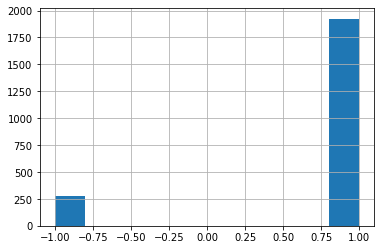

In [18]:
processed_sentiment['sentiment_value'].hist()

In [42]:
final_data.rename({'Date': 'date'}, axis=1, inplace=True)

In [43]:
processed_sentiment['date']=pd.to_datetime(processed_sentiment['date'], format='%Y-%m-%d')

In [44]:
master_data=final_data.merge(processed_sentiment, on='date')

In [45]:
master_data.head()

,date,Open,High,Low,Close,Volume,Currency,daily_return,stationary_converted,12_days_simple_moving_average of closing values,12_days_exponential_moving_average of closing values,12_days_rolling_std of closing values,30_days_simple_moving_average of closing values,30_days_exponential_moving_average of closing values,30_days_rolling_std of closing values,60_days_simple_moving_average of closing values,60_days_exponential_moving_average of closing values,60_days_rolling_std of closing values,Unnamed: 0,tweet_news_combined,scores,compound,sentiment_value
0,2015-01-01,226.83,229.83,226.73,229.37,1849322,INR,NaN,NaN,NaN,NaN,NaN,NaN,229.370000,NaN,NaN,229.370000,NaN,0,shelarashish examples cars parked vertically o...,"{'neg': 0.122, 'neu': 0.659, 'pos': 0.22, 'com...",0.9936,1
1,2015-01-02,229.40,235.00,229.40,232.80,3736467,INR,0.014954,3.43,NaN,3.430000,NaN,NaN,231.142167,NaN,NaN,231.113583,NaN,1,brainstorming options future ongc ould newbury...,"{'neg': 0.011, 'neu': 0.682, 'pos': 0.307, 'co...",0.9994,1
2,2015-01-05,231.33,238.67,230.67,235.43,6074616,INR,0.011297,2.63,NaN,2.996667,NaN,NaN,232.667753,NaN,NaN,232.600611,NaN,4,russian ltbgtshaleltbgt beating us ongcamps la...,"{'neg': 0.071, 'neu': 0.682, 'pos': 0.247, 'co...",0.9978,1
3,2015-01-06,232.37,232.63,220.40,222.10,9024993,INR,-0.056620,-13.33,NaN,-3.375635,NaN,NaN,229.755952,NaN,NaN,229.842767,NaN,5,russian shale beating us ongcs last bet corpor...,"{'neg': 0.164, 'neu': 0.711, 'pos': 0.125, 'co...",-0.9994,-1
4,2015-01-07,222.00,227.70,218.73,225.37,8937666,INR,0.014723,3.27,NaN,-1.277868,NaN,NaN,228.758042,NaN,NaN,228.887600,NaN,6,enthusiasm doesnt hold forever dugalira ugly s...,"{'neg': 0.077, 'neu': 0.794, 'pos': 0.13, 'com...",0.9846,1


In [46]:
master_data=master_data[['date','Close','stationary_converted','compound','sentiment_value']]

In [47]:
master_data=master_data.dropna().reset_index(drop=True)
master_data.head()

,date,Close,stationary_converted,compound,sentiment_value
0,2015-01-02,232.80,3.43,0.9994,1
1,2015-01-05,235.43,2.63,0.9978,1
2,2015-01-06,222.10,-13.33,-0.9994,-1
3,2015-01-07,225.37,3.27,0.9846,1
4,2015-01-08,227.87,2.50,0.9996,1



2. LSTM
3. LSTM with tweets

Train test split

In [23]:
# Creating train and test data
# This function take into account the data and the proportion which the data will be splitte into.
# The function returns the train and test set
def train_test_split(data,proportion):
    train_size = int(len(data)*proportion)
    test_size=int((len(data)-train_size)/2)
    valid_size = len(data)-train_size-test_size
    train,valid,test = data[0:train_size],data[train_size:train_size+valid_size],data[train_size+valid_size:]
    return train,valid,test

In [24]:
train_stock, valid_stock, test_stock=train_test_split(master_data,0.7)

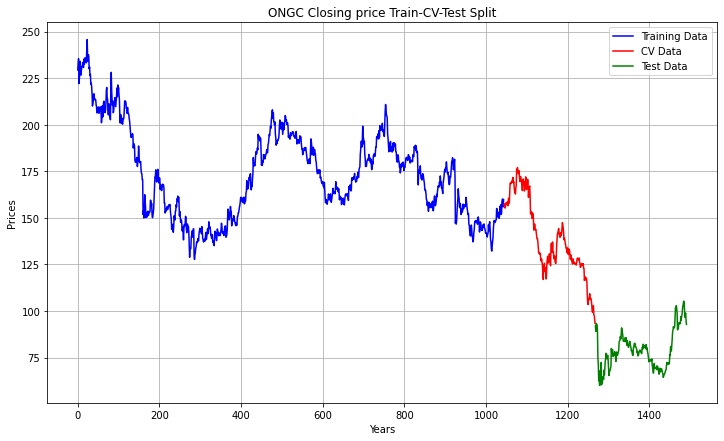

In [25]:
plt.figure(figsize=(12,7))
plt.title('ONGC Closing price Train-CV-Test Split')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(train_stock['Close'], 'blue', label='Training Data')
plt.plot(valid_stock['Close'], 'red', label='CV Data')
plt.plot(test_stock['Close'], 'green', label='Test Data')
plt.grid()
plt.legend()

#Classical LSTM

In [26]:
# This function takes into account the number of time points that should be considered.
def data_for_modelling(data, time_points):

  # We define two empty lists where the final value will be stored.
  list_x=[]
  list_y=[]
  for i in range(len(data)-time_points-1):
    val=data[i:(i+time_points),0]
    list_x.append(val)
    list_y.append(data[i+time_points,0])
  return  np.array(list_x), np.array(list_y)

In [27]:
# Data preprocessing
measure=MinMaxScaler(feature_range=(0,1))
def prepare_data(data):
  data=measure.fit_transform(np.array(data).reshape(-1,1))
  return data

In [28]:
train_stock_scaled=prepare_data(train_stock['Close'])
valid_stock_scaled=prepare_data(valid_stock['Close'])
test_stock_sclaed=prepare_data(test_stock['Close'])

In [29]:
train_x,train_y=data_for_modelling(train_stock_scaled,60)
valid_x, valid_y=data_for_modelling(valid_stock_scaled,60)
test_x,test_y= data_for_modelling(test_stock_sclaed,60)

In [30]:
print(train_x.shape,valid_x.shape)

(983, 60) (163, 60)


In [31]:


# Reshaping the input variables as LSTM takes 3- dimensional data

train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
valid_x=valid_x.reshape(valid_x.shape[0],valid_x.shape[1],1)
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [32]:
model_lstm= Sequential([
                        LSTM(units=90,return_sequences=True,
                        activation='relu',
                        input_shape=train_x.shape[-2:]),
                        Dropout(0.2),
                        LSTM(units=50,activation='relu'),
                        Dense(units=1, name='output_layer')                     
])

#Compiling the network
model_lstm.compile(optimizer='adam',loss='mean_squared_error')


In [33]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 90)            33120     
_________________________________________________________________
dropout (Dropout)            (None, 60, 90)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                28200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 61,371
Trainable params: 61,371
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_lstm.fit(train_x,train_y, validation_data=(valid_x,valid_y), epochs=10, batch_size=70, verbose=True)

Epoch 1/10
15/15 [==============================] - 7s 285ms/step - loss: 0.1078 - val_loss: 0.0121
Epoch 2/10
15/15 [==============================] - 4s 252ms/step - loss: 0.0143 - val_loss: 0.0105
Epoch 3/10
15/15 [==============================] - 4s 262ms/step - loss: 0.0056 - val_loss: 0.0094
Epoch 4/10
15/15 [==============================] - 4s 249ms/step - loss: 0.0040 - val_loss: 0.0112
Epoch 5/10
15/15 [==============================] - 4s 249ms/step - loss: 0.0036 - val_loss: 0.0097
Epoch 6/10
15/15 [==============================] - 4s 252ms/step - loss: 0.0033 - val_loss: 0.0068
Epoch 7/10
15/15 [==============================] - 4s 251ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 8/10
15/15 [==============================] - 4s 247ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 9/10
15/15 [==============================] - 4s 250ms/step - loss: 0.0031 - val_loss: 0.0066
Epoch 10/10
15/15 [==============================] - 4s 258ms/step - loss: 0.0030 - val_loss: 0.0048

In [35]:
# Predicting the data using the model

pred_train=model_lstm.predict(train_x)
pred_valid=model_lstm.predict(valid_x)

In [36]:
# Transforming the data into its original form

pred_train=measure.inverse_transform(pred_train)
pred_valid=measure.inverse_transform(pred_valid)

In [37]:
# RMSE for the train set and the test set

print(math.sqrt(mean_squared_error(train_y,pred_train)),math.sqrt(mean_squared_error(valid_y,pred_valid)))

76.20168820577766 80.46012577156121


In [38]:
pred_test=model_lstm.predict(test_x)
pred_test=measure.inverse_transform(pred_test)

In [39]:
print(math.sqrt(mean_squared_error(test_y,pred_test)))

79.0544541801872


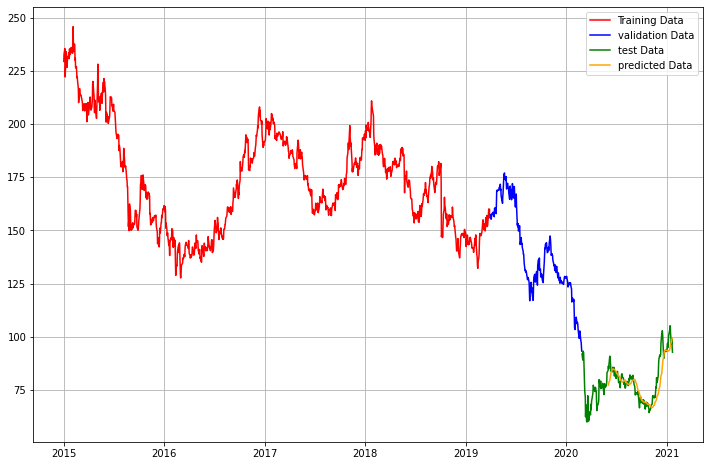

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(train_stock['date'],train_stock['Close'], color='red',label='Training Data')
plt.plot(valid_stock['date'],valid_stock['Close'],color='blue',label='validation Data')
plt.plot(test_stock['date'],test_stock['Close'], color='green',label='test Data')
plt.plot(test_stock[61:]['date'],pred_test, color='orange',label='predicted Data')
plt.grid()
plt.legend()

#Hyper parameter tuning for classical LSTM method

In [47]:
!pip install keras-tuner

     |████████████████████████████████| 102kB 4.3MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=8e9890e647a3d5becff54913816568377e66ad15ecd56f2012418ab9a4b2c108
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [41]:
from keras_tuner import BayesianOptimization

In [42]:
def build_model(hp):
  model_clcl_lstm = Sequential()
  model_clcl_lstm.add(LSTM(units=hp.Int('units',min_value=32,
                                  max_value=512,
                                  step=32), 
              activation='tanh', input_shape=train_x.shape[-2:]))
  model_clcl_lstm.add(Dropout(rate=0.2))
  model_clcl_lstm.add(Dense(units=hp.Int('units',min_value=32,
                                  max_value=512,
                                  step=32), activation='relu'))
  model_clcl_lstm.add(Dense(1))
  model_clcl_lstm.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
      hp.Choice('learning_rate',
                values=[1e-2, 1e-3, 1e-4])))
  return model_clcl_lstm

In [43]:
import os
import hyperopt

In [48]:
bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=2,
    executions_per_trial=1,
    directory=('/content/drive/MyDrive/bdos_fp_data/bayesian_hyperparameter_tuning/classical_lstm'),
    project_name='kerastuner_bayesian_poc',
    overwrite=False)

bayesian_opt_tuner.search(train_x, train_y,epochs=10,
     validation_data=(valid_x, valid_y), verbose=1)
     #validation_split=0.2,verbose=1)


bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model_clcl_lstm = bayes_opt_model_best_model[0]

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/bdos_fp_data/bayesian_hyperparameter_tuning/classical_lstm/kerastuner_bayesian_poc/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/bdos_fp_data/bayesian_hyperparameter_tuning/classical_lstm/kerastuner_bayesian_poc/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [49]:
model_clcl_lstm.fit(train_x,train_y, validation_data=(valid_x,valid_y), epochs=10, batch_size=70, verbose=True)

Epoch 1/10
15/15 [==============================] - 4s 173ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2/10
15/15 [==============================] - 2s 150ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3/10
15/15 [==============================] - 2s 147ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 4/10
15/15 [==============================] - 2s 154ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 5/10
15/15 [==============================] - 2s 153ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 6/10
15/15 [==============================] - 2s 147ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 7/10
15/15 [==============================] - 2s 150ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 8/10
15/15 [==============================] - 2s 144ms/step - loss: 0.

In [50]:
# Predicting the data using the model

pred_train=model_clcl_lstm.predict(train_x)
pred_valid=model_clcl_lstm.predict(valid_x)

In [51]:
# Transforming the data into its original form

pred_train=measure.inverse_transform(pred_train)
pred_valid=measure.inverse_transform(pred_valid)

In [52]:
# RMSE for the train set and the test set

print(math.sqrt(mean_squared_error(train_y,pred_train)),math.sqrt(mean_squared_error(valid_y,pred_valid)))

71.17961841879449 73.76553750991397


In [53]:
pred_test=model_clcl_lstm.predict(test_x)
pred_test=measure.inverse_transform(pred_test)

In [54]:
print(math.sqrt(mean_squared_error(test_y,pred_test)))

74.35711897901496


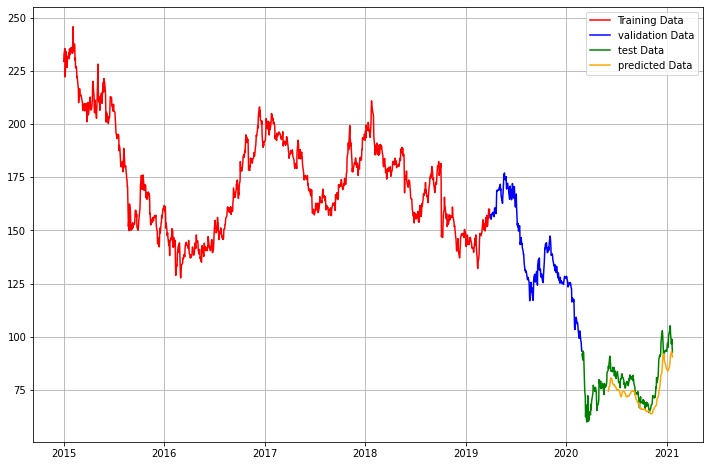

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(train_stock['date'],train_stock['Close'], color='red',label='Training Data')
plt.plot(valid_stock['date'],valid_stock['Close'],color='blue',label='validation Data')
plt.plot(test_stock['date'],test_stock['Close'], color='green',label='test Data')
plt.plot(test_stock[61:]['date'],pred_test, color='orange',label='predicted Data')
plt.grid()
plt.legend()

# LSTM with news headlines

In [56]:
# Filter the data

news_stock=master_data[['date','Close','compound']]

In [57]:
news_stock.head()

,date,Close,compound
0,2015-01-01,229.37,0.9936
1,2015-01-02,232.80,0.9994
2,2015-01-05,235.43,0.9978
3,2015-01-06,222.10,-0.9994
4,2015-01-07,225.37,0.9846


In [58]:
# Split the data
train_news_stock, valid_news_stock, test_news_stock=train_test_split(master_data,0.7)


In [59]:
train_stock_scaled=prepare_data(train_stock['Close'])
valid_stock_scaled=prepare_data(valid_stock['Close'])
test_stock_sclaed=prepare_data(test_stock['Close'])

train_news_scaled=prepare_data(train_stock['Close'])
valid_news_scaled=prepare_data(valid_stock['Close'])
test_news_sclaed=prepare_data(test_stock['Close'])

In [60]:
# This function takes into account the number of time points that should be considered.
def data_for_modelling(data,news_data, time_points):

  # We define two empty lists where the final value will be stored.
  list_x=[]
  list_y=[]
  for i in range(len(data)-time_points-1):
    val=data[i:(i+time_points),0]
    list_x.append(val)
    list_y.append(data[i+time_points,0])
  return  np.array(list_x), np.array(list_y)

In [61]:
#Creating Dataset with window size = 60 + News Sentiment of Last Day

train_x_news,train_y_news=data_for_modelling(train_stock_scaled,train_news_scaled,60)
valid_x_news, valid_y_news=data_for_modelling(valid_stock_scaled,valid_news_scaled,60)
test_x_news,test_y_news= data_for_modelling(test_stock_sclaed,test_news_sclaed,60)

In [62]:
# Reshaping the input variables as LSTM takes 3- dimensional data

train_x_news=train_x_news.reshape(train_x_news.shape[0],train_x_news.shape[1],1)
valid_x_news=valid_x_news.reshape(valid_x_news.shape[0],valid_x_news.shape[1],1)
test_x_news=test_x_news.reshape(test_x_news.shape[0],test_x_news.shape[1],1)

In [88]:
model_lstm_news= Sequential([
                        LSTM(units=50,return_sequences=True,
                        activation='relu',
                        input_shape=(train_x_news.shape[1],1)),
                        Dropout(0.1),
                        LSTM(units=50, activation='relu'),
                        Dense(units=1, name='output_layer')
])

#Compiling the network
model_lstm_news.compile(optimizer='adam',loss='mean_squared_error')


In [89]:
model_lstm_news.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_lstm_news.fit(train_x_news,train_y_news, validation_data=(valid_x_news,valid_y_news), epochs=10, batch_size=70, verbose=True)

Epoch 1/10
15/15 [==============================] - 7s 285ms/step - loss: 0.0975 - val_loss: 0.0201
Epoch 2/10
15/15 [==============================] - 4s 262ms/step - loss: 0.0141 - val_loss: 0.0128
Epoch 3/10
15/15 [==============================] - 4s 261ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 4/10
15/15 [==============================] - 4s 264ms/step - loss: 0.0040 - val_loss: 0.0087
Epoch 5/10
15/15 [==============================] - 4s 270ms/step - loss: 0.0034 - val_loss: 0.0082
Epoch 6/10
15/15 [==============================] - 4s 261ms/step - loss: 0.0031 - val_loss: 0.0052
Epoch 7/10
15/15 [==============================] - 4s 264ms/step - loss: 0.0033 - val_loss: 0.0061
Epoch 8/10
15/15 [==============================] - 4s 260ms/step - loss: 0.0030 - val_loss: 0.0065
Epoch 9/10
15/15 [==============================] - 4s 269ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 10/10
15/15 [==============================] - 4s 262ms/step - loss: 0.0027 - val_loss: 0.0040

In [95]:
# Predicting the data using the model

pred_train_news=model_lstm_news.predict(train_x_news)
pred_valid_news=model_lstm_news.predict(valid_x_news)

In [96]:
# Transforming the data into its original form
pred_train_news=measure.inverse_transform(pred_train_news)
pred_valid_news=measure.inverse_transform(pred_valid_news)

In [97]:
# RMSE for the train set and the test set
print(math.sqrt(mean_squared_error(train_y,pred_train)),math.sqrt(mean_squared_error(valid_y,pred_valid)))

71.17961841879449 73.76553750991397


In [98]:
pred_test_news=model_lstm_news.predict(test_x_news)
pred_test_news=measure.inverse_transform(pred_test_news)

In [99]:
print(math.sqrt(mean_squared_error(test_y_news,pred_test_news))) 

78.69266225485521


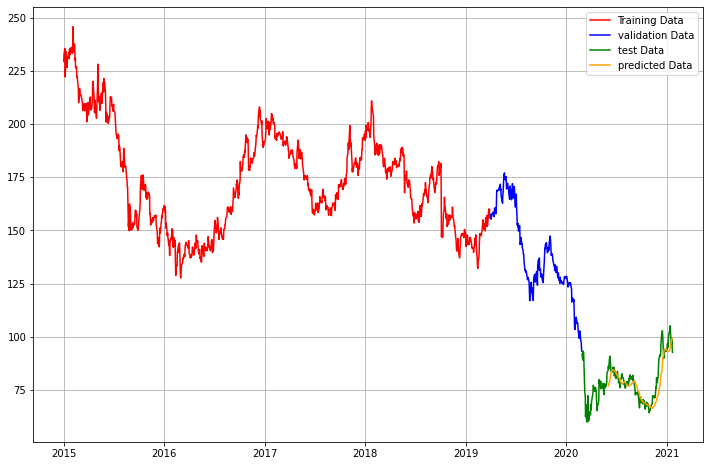

In [100]:
plt.figure(figsize=(12, 8))
plt.plot(train_news_stock['date'],train_news_stock['Close'], color='red',label='Training Data')
plt.plot(valid_news_stock['date'],valid_news_stock['Close'],color='blue',label='validation Data')
plt.plot(test_news_stock['date'],test_news_stock['Close'], color='green',label='test Data')
plt.plot(test_news_stock[61:]['date'],pred_test_news, color='orange',label='predicted Data')
plt.grid()
plt.legend()

# Hyper parameter tuning

In [139]:
def build_news_model(hp):
  model_news_lstm = Sequential()
  model_news_lstm.add(
            LSTM(units=hp.Int
                 ('units',min_value=32,
                max_value=512,
                step=32), 
                activation='relu', 
                input_shape=train_x.shape[-2:])
            )
  model_news_lstm.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
                ))
            )
  model_news_lstm.add(
            Dense(units=hp.Int(
                'units',min_value=32,
                max_value=512,
                step=32), activation='relu'))
  model_news_lstm.add(Dense(1))

  # Model compilation
  model_news_lstm.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
      hp.Choice('learning_rate',
                values=[1e-2, 1e-3, 1e-4])))
  return model_news_lstm

In [141]:
bayesian_opt_tuner_news = BayesianOptimization(
    build_news_model,
    objective='mse',
    max_trials=3,
    executions_per_trial=1,
    directory=('/content/drive/MyDrive/bdos_fp_data/bayesian_hyperparameter_tuning/news_lstm'),
    project_name='kerastuner_bayesian_news',
    overwrite=False)

bayesian_opt_tuner_news.search(train_x_news, train_y_news,epochs=10,
     validation_data=(valid_x_news, valid_y_news), verbose=1)
     #validation_split=0.2,verbose=1)

bayes_opt_model_best_model_news = bayesian_opt_tuner_news.get_best_models(num_models=1)
best_model_news_lstm = bayes_opt_model_best_model_news[0]

Trial 3 Complete [00h 00m 44s]
mse: 0.005635863170027733

Best mse So Far: 0.0016602318501099944
Total elapsed time: 00h 02m 56s
INFO:tensorflow:Oracle triggered exit


In [142]:
best_model_news_lstm.fit(train_x_news,train_y_news, validation_data=(valid_x_news,valid_y_news), epochs=10, batch_size=70, verbose=True)

Epoch 1/10
15/15 [==============================] - 4s 157ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/10
15/15 [==============================] - 2s 152ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/10
15/15 [==============================] - 2s 145ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4/10
15/15 [==============================] - 2s 151ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 5/10
15/15 [==============================] - 2s 146ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/10
15/15 [==============================] - 2s 144ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/10
15/15 [==============================] - 2s 145ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 8/10
15/15 [==============================] - 2s 148ms/step - loss: 0.

In [143]:
# Predicting the data using the model
pred_train_news=best_model_news_lstm.predict(train_x_news)
pred_valid_news=best_model_news_lstm.predict(valid_x_news)

In [144]:
# Transforming the data into its original form
pred_train_news=measure.inverse_transform(pred_train_news)
pred_valid_news=measure.inverse_transform(pred_valid_news)

In [145]:
# RMSE for the train set and the test set
print(math.sqrt(mean_squared_error(train_y,pred_train)),math.sqrt(mean_squared_error(valid_y,pred_valid)))

71.17961841879449 73.76553750991397


In [146]:
pred_test_news=best_model_news_lstm.predict(test_x_news)
pred_test_news=measure.inverse_transform(pred_test_news)

In [147]:
print(math.sqrt(mean_squared_error(test_y_news,pred_test_news)))

79.81264980359038


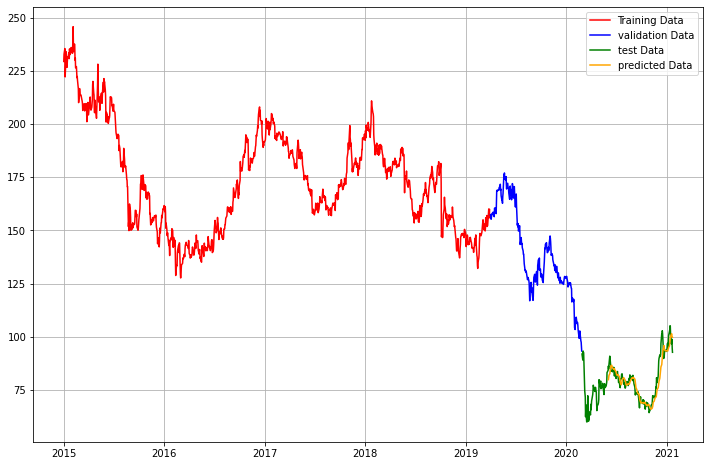

In [148]:
plt.figure(figsize=(12, 8))
plt.plot(train_news_stock['date'],train_news_stock['Close'], color='red',label='Training Data')
plt.plot(valid_news_stock['date'],valid_news_stock['Close'],color='blue',label='validation Data')
plt.plot(test_news_stock['date'],test_news_stock['Close'], color='green',label='test Data')
plt.plot(test_news_stock[61:]['date'],pred_test_news, color='orange',label='predicted Data')
plt.grid()
plt.legend()